In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [2]:
google_ps = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
google_ps.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
google_ps.shape

(64295, 5)

In [7]:
google_ps.size

321475

In [9]:
google_ps.describe

<bound method NDFrame.describe of                                App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290              

In [10]:
google_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
play_store = google_ps[google_ps['Sentiment'] != 'neutral']

play_store.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
play_store.dropna(how='all',axis=0)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [15]:
play_store['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [16]:
sentiment_label = play_store.Sentiment.factorize()

In [17]:
sentiment_label

(array([ 0,  0, -1, ..., -1, -1, -1], dtype=int64),
 Index(['Positive', 'Neutral', 'Negative'], dtype='object'))

In [21]:
play_store = play_store.dropna()

In [22]:
play = play_store.Translated_Review.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(play)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(play)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [23]:
tokenizer.word_index

{'i': 1,
 'game': 2,
 'it': 3,
 'the': 4,
 'like': 5,
 'good': 6,
 'this': 7,
 'app': 8,
 'great': 9,
 'get': 10,
 'love': 11,
 'time': 12,
 'would': 13,
 'really': 14,
 'even': 15,
 "it's": 16,
 "can't": 17,
 'ads': 18,
 'update': 19,
 "i'm": 20,
 'play': 21,
 'please': 22,
 'phone': 23,
 'work': 24,
 'also': 25,
 'you': 26,
 'much': 27,
 'easy': 28,
 'but': 29,
 'not': 30,
 'and': 31,
 'make': 32,
 'way': 33,
 'many': 34,
 'want': 35,
 'new': 36,
 'best': 37,
 'need': 38,
 'back': 39,
 'every': 40,
 'still': 41,
 'fix': 42,
 'fun': 43,
 "i've": 44,
 'very': 45,
 'better': 46,
 'so': 47,
 'to': 48,
 '5': 49,
 'nice': 50,
 'see': 51,
 'free': 52,
 'go': 53,
 'could': 54,
 'used': 55,
 'well': 56,
 'using': 57,
 'money': 58,
 'if': 59,
 'keep': 60,
 'people': 61,
 'a': 62,
 'add': 63,
 'give': 64,
 'problem': 65,
 'now': 66,
 '2': 67,
 'my': 68,
 'pay': 69,
 'know': 70,
 'is': 71,
 'never': 72,
 'screen': 73,
 'in': 74,
 'version': 75,
 'think': 76,
 'able': 77,
 'level': 78,
 'find': 7

In [38]:
#play_store[2]
#encoded_docs[2]

KeyError: 2

In [29]:
padded_sequence[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [31]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           706720    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 723,371
Trainable params: 723,371
Non-trainable params: 0
__________________________________________________

In [33]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
936/936 [==============================] - 210s 212ms/step - loss: -0.5734 - accuracy: 0.3736 - val_loss: -4.1855 - val_accuracy: 0.3620
Epoch 2/5
936/936 [==============================] - 186s 198ms/step - loss: -1.1798 - accuracy: 0.3739 - val_loss: -6.5916 - val_accuracy: 0.3620
Epoch 3/5
936/936 [==============================] - 196s 210ms/step - loss: -1.6809 - accuracy: 0.3739 - val_loss: -8.9051 - val_accuracy: 0.3620
Epoch 4/5
936/936 [==============================] - 192s 206ms/step - loss: -2.2528 - accuracy: 0.3739 - val_loss: -10.8875 - val_accuracy: 0.3620
Epoch 5/5
936/936 [==============================] - 197s 210ms/step - loss: -4.8023 - accuracy: 0.3739 - val_loss: -11.6483 - val_accuracy: 0.3620


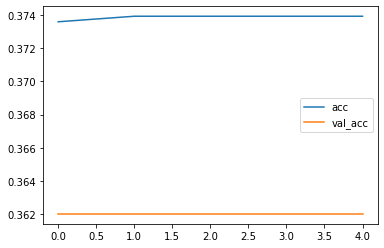

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("The Accuracy.jpg")

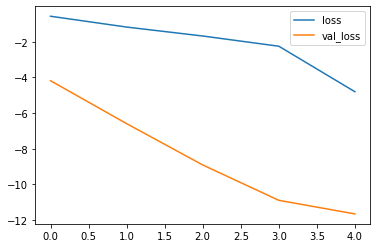

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("The Loss plot.jpg")

In [39]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [40]:
test_sentence1 = 'I love the game'
predict_sentiment(test_sentence1)

test_sentence2 = "Too many ads,it's annoying"
predict_sentiment(test_sentence2)

1/1 [==============================] - 1s 859ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 78ms/step
Predicted label:  Positive


<BarContainer object of 37427 artists>

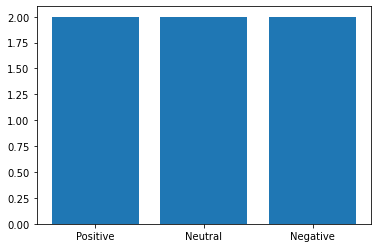

In [44]:
plt.bar(x='Sentiment',data=play_store,height=2)

In [42]:
play_store.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')